<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/Neural_Networks_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratch Neural Network

## problema 1-5: implementación

- Problema 1: inicialización de los valores de los pesos iniciales (implementado en `def __init__(sefl, batch_size = 20, ...)`)
- Problema 2: implementación de la propagación hacia delante (implementado en `def forward(self, X)`)
- Problema 3: implementación de Cross-Entropy Error (implementado en `def cross_entropy_error(self, y, Z)`)
- Problema 4: implementación de la propagación hacia atrás (implementado en `def backward(self, X, y)`)
- Problema 5: Estimación (implementado en `def predict(self, X)`)

In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class ScratchSimpleNeuralNetworkClassifier():
    def __init__(self, batch_size = 20, n_features = 784, n_nodes1 = 400, n_nodes2 = 200, n_output = 10, sigma = 0.02, lr = 0.01, epoch = 10, verbose = True):
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        self.loss_train = []
        self.loss_val = []

        # Problema 1: Determine the initial values of the weights.
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)

    def fit(self, X, y, X_val=None, y_val=None):
        for e in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

            for mini_X_train, mini_y_train in get_mini_batch:
                self.forward(mini_X_train)
                self.backward(mini_X_train, mini_y_train)
            self.forward(X)

            # Calculating loss for training and validation data
            train_loss = self.cross_entropy_error(y, self.Z3)
            self.loss_train.append(train_loss)

            if X_val is not None:
                self.forward(X_val)
                val_loss = self.cross_entropy_error(y_val, self.Z3)
                self.loss_val.append(val_loss)

            if self.verbose:
                print(f'Epoch {e+1}/{self.epoch}, Train Loss: {train_loss:.4f}',
                    f'Val Loss: {val_loss:.4f}' if X_val is not None and y_val is not None else '')

    # Problem 2: Implementaion of Forward Propagation
    def forward(self, X):
        # First layer
        self.A1 = X @ self.W1 + self.B1
        self.Z1 = self.tanh_function(self.A1)
        # Second layer
        self.A2 = self.Z1 @ self.W2 + self.B2
        self.Z2 = self.tanh_function(self.A2)
        # Third layer (output)
        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = self.softmax(self.A3)

    # Problema 4: Back-propagation implementation
    def backward(self, X, y):
        # Third layer
        dA3 = (self.Z3 - y)/self.batch_size
        dW3 = self.Z2.T @ dA3
        dB3 = np.sum(dA3, axis=0)
        dZ2 = dA3 @ self.W3.T
        # Second layer
        dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
        dW2 = self.Z1.T @ dA2
        dB2 = np.sum(dA2, axis=0)
        dZ1 = dA2 @ self.W2.T
        # First layer
        dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
        dW1 = X.T @ dA1
        dB1 = np.sum(dA1, axis=0)
        # Updating weights and biases
        self.W3 -= self.lr * dW3
        self.B3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.B2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.B1 -= self.lr * dB1

    def tanh_function(self, X):
        result = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
        # or
        #  result = np.tanh(X)
        return result

    def softmax(self, X):
        result = np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)
        return result

    # Problem 3: Implementation of Cross-Entropy Error
    def cross_entropy_error(self, y, Z):
        L = - np.sum(y * np.log(Z+1e-7)) / len(y)
        return L

    # Problema 5: Estimation
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z3, axis=1)


class GetMiniBatch:
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = int(np.ceil(X.shape[0]/self.batch_size))

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


# Loading MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train, y_train, X_test, y_test = X_train[:6000], y_train[:6000], X_test[:1000], y_test[:1000]
# Preprocessimg
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255
print(X_test.shape)

# One-hot encode labels
from packaging.version import Version
import sklearn

if Version(sklearn.__version__) >= Version('1.2'):
    enc  = OneHotEncoder(sparse_output=False)
else:
    enc = OneHotEncoder(sparse=False)

y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = enc.transform(y_test.reshape(-1, 1))

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Converting one-hot back to labels for validation
y_val_labels = np.argmax(y_val, axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 784)


## Problema 6: entrenamieto y estimación

In [3]:
model = ScratchSimpleNeuralNetworkClassifier(
    n_nodes1=400, n_nodes2=200, sigma=0.01, lr=0.01, epoch=20, batch_size=20)
model.fit(X_train, y_train, X_val, y_val)

# Predictions
y_pred = model.predict(X_val)
accuracy = np.mean(y_pred == y_val_labels)
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/20, Train Loss: 0.6718 Val Loss: 0.6678
Epoch 2/20, Train Loss: 0.4076 Val Loss: 0.4072
Epoch 3/20, Train Loss: 0.3469 Val Loss: 0.3486
Epoch 4/20, Train Loss: 0.3155 Val Loss: 0.3195
Epoch 5/20, Train Loss: 0.2902 Val Loss: 0.2964
Epoch 6/20, Train Loss: 0.2685 Val Loss: 0.2766
Epoch 7/20, Train Loss: 0.2497 Val Loss: 0.2596
Epoch 8/20, Train Loss: 0.2331 Val Loss: 0.2448
Epoch 9/20, Train Loss: 0.2181 Val Loss: 0.2315
Epoch 10/20, Train Loss: 0.2042 Val Loss: 0.2190
Epoch 11/20, Train Loss: 0.1912 Val Loss: 0.2074
Epoch 12/20, Train Loss: 0.1793 Val Loss: 0.1967
Epoch 13/20, Train Loss: 0.1683 Val Loss: 0.1869
Epoch 14/20, Train Loss: 0.1583 Val Loss: 0.1780
Epoch 15/20, Train Loss: 0.1492 Val Loss: 0.1701
Epoch 16/20, Train Loss: 0.1409 Val Loss: 0.1629
Epoch 17/20, Train Loss: 0.1332 Val Loss: 0.1563
Epoch 18/20, Train Loss: 0.1261 Val Loss: 0.1504
Epoch 19/20, Train Loss: 0.1196 Val Loss: 0.1450
Epoch 20/20, Train Loss: 0.1135 Val Loss: 0.1401
Validation Accuracy: 0.9583


## Problema 7: grafica de la curva de aprendizaje

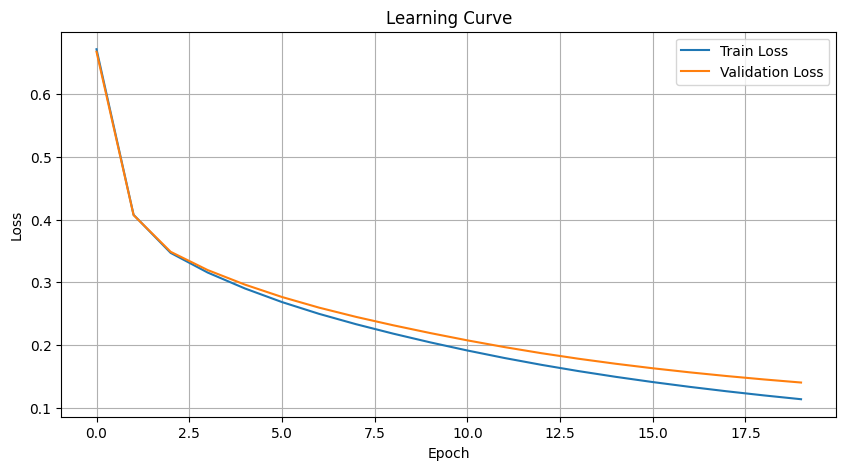

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss_train, label='Train Loss')
plt.plot(model.loss_val, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## Problema 8: Verificar estimación erronea

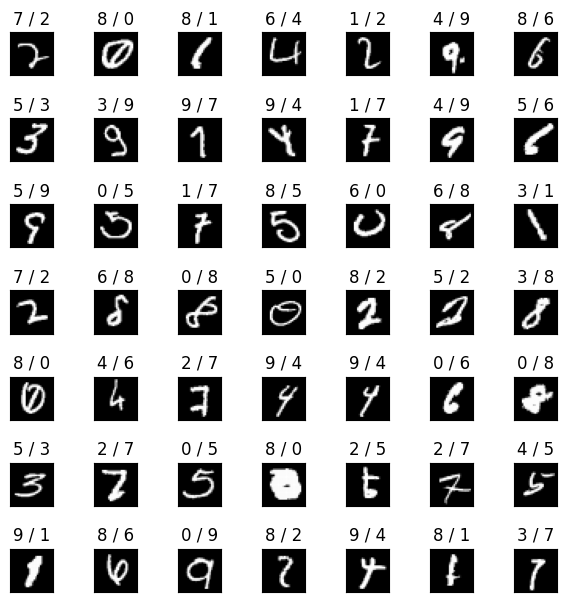

In [5]:
num = 49 # How many to display
true_false = y_pred == y_val_labels
false_list = np.where(true_false == False)[0].astype(int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(7, 7, i+1, xticks=[], yticks=[])
    ax.set_title(f'{y_pred[false_list[i]]} / {y_val_labels[false_list[i]]}')
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
plt.show()